## Logistic Regresion

### 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

In [2]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


### 2. 데이터 준비

In [3]:
# EmployeeNumber drop
data.drop('EmployeeNumber', axis=1, inplace=True)

In [4]:
# x, y 나누기
target = 'Attrition'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [ ]:
# NA 조치

In [5]:
# 가변수화
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)

In [6]:
# train, valid 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

In [ ]:
# Scaling

### 3. 모델링

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import * 

In [9]:
# 모델 선언
model = LogisticRegression()

In [10]:
# 학습
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
# 예측
print(list(x_train))
print(model.coef_)

['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'Gender_Male', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']
[[-3.84351776e-02  3.84109660e-02 -7.07163728e-05 -2.82800745e-02
  -3.93205061e-02  2.30389163e-01 -2.18808054e-01 -1.05153540e-01
  -3.11618983e-01 -4.12369946e-01  8.41629589e-01  1.26840274e+00]]


In [13]:
pred = model.predict(x_val)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
# 평가
# 정분류율
accuracy_score( y_val , pred )

0.8551532033426184

### 4. 분류 모델 평가

In [15]:
# Confusion Matrix
confusion_matrix(y_val , pred)

array([[293,   7],
       [ 45,  14]], dtype=int64)

In [16]:
# classification_report
print(classification_report(y_val , pred  ))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       300
           1       0.67      0.24      0.35        59

    accuracy                           0.86       359
   macro avg       0.77      0.61      0.63       359
weighted avg       0.83      0.86      0.83       359



In [17]:
# 정분류율
accuracy_score(y_val, pred)

0.8551532033426184

In [18]:
# 정밀도
print(precision_score(y_val, pred, pos_label = 0))
print(precision_score(y_val, pred, pos_label = 1))

0.8668639053254438
0.6666666666666666


In [19]:
# 재현율
print(recall_score(y_val, pred, pos_label = 0))
print(recall_score(y_val, pred, pos_label = 1))

0.9766666666666667
0.23728813559322035


In [20]:
# f1_score
print(f1_score(y_val, pred, pos_label = 0))
print(f1_score(y_val, pred, pos_label = 1))

0.9184952978056425
0.35


#### cut-off에 따른 성능 그래프 : precision recall curve

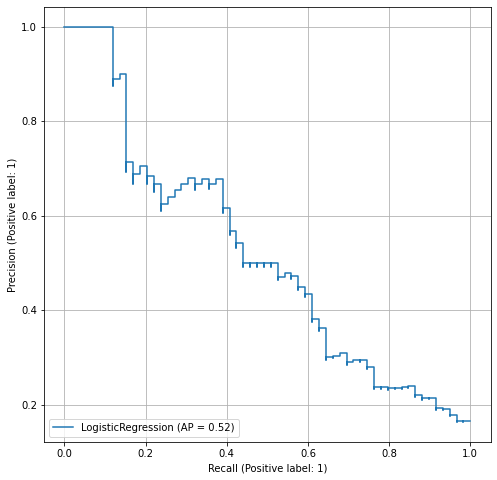

In [21]:
plt.figure(figsize = (8,8))
pr_curve = plot_precision_recall_curve(model, x_val, y_val, ax = plt.gca())
plt.grid()
plt.show()

- plot_precision_recall_curve의 결과를 저장하고
- .average_precision 속성을 불러오면 계산된 아래 면적을 알 수 있음.

In [22]:
pr_curve.average_precision

0.5169763388954318

### 5. 실습 : 이동통신 가입 고객 이탈 예측

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)

#### (1) 데이터 전처리

In [23]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [24]:
# id drop
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

In [25]:
# x, y 나누기
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [26]:
# 가변수화
cat_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [27]:
# train, val 나누기
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3)

#### (2) 모델링 : 로지스틱 회귀

In [29]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)

In [30]:
print(confusion_matrix(y_val, pred1))
print('-'*20)
print(classification_report(y_val, pred1))

[[1822 1135]
 [1056 1987]]
--------------------
              precision    recall  f1-score   support

       LEAVE       0.63      0.62      0.62      2957
        STAY       0.64      0.65      0.64      3043

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



#### (3) 모델링 : KNN

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model2 = KNeighborsClassifier(n_neighbors = 50)
model2.fit(x_train_s, y_train)
pred2 = model2.predict(x_val_s)

In [34]:
print(confusion_matrix(y_val, pred2))
print('-'*20)
print(classification_report(y_val, pred2))

[[1586 1371]
 [ 893 2150]]
--------------------
              precision    recall  f1-score   support

       LEAVE       0.64      0.54      0.58      2957
        STAY       0.61      0.71      0.66      3043

    accuracy                           0.62      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.62      0.62      0.62      6000



In [35]:
print(confusion_matrix(y_val, pred1))
print('-'*20)
print(classification_report(y_val, pred1))

[[1822 1135]
 [1056 1987]]
--------------------
              precision    recall  f1-score   support

       LEAVE       0.63      0.62      0.62      2957
        STAY       0.64      0.65      0.64      3043

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000

